# Project 1: SAT & ACT Analysis

## Problem Statement

With declining SAT participation rates statewide due to the seemingly unstoppable ACT seizing increasing market share, greater emphasis must be placed on restoring the College Board's premier status with its redesigned SAT. 

By conducting thorough analyses on the datasets containing the average SAT and ACT scores by state, as well as participation rates for the graduating class of 2017/18, key insights have been identified to aid us in providing recommendations to the College Board to boost SAT participation rates in a suitable state.

## Executive Summary

This exploratory data analysis combines the use of a heatmap, histograms, scatter plots and boxplots to obtain a complete statistical picture of the data sets. The findings show that high participation rates for a test in one state usually corresponds with low participation rates in the other test, particularly for states where one of the tests is mandatory. We also see that fluctuations in participation rates from 2017 to 2018 were a consequence of state education laws switching preferences between the SAT and ACT, or completely doing away with standardised testing. As such, we recommend reducing efforts to increase participation rates in states that have either recently begun mandatory ACT testing, or removed the need for such tests. 

The list of suitable states was narrowed down by eliminating states which already require standardised testing, as well as states that offer financial subsidies for these tests. Another layer of filtering was applied to reveal which states had less than 50% participation rates in both of these tests. Two states were initially identified (Alaska and Oregon) and with further analysis, the final recommendation is for the College Board to focus its efforts on increasing SAT participation rates in the state of Oregon. 

We do advise providing sufficient time for states to transition over to mandatory state testing, as large increases in participation rates are negatively correlated with test scores, mainly due to the need for schools and institutions to roll out large-scale changes to accommodate the SAT syllabus and assessment criteria.

This report also investigates the limitations of performing statistical inferences that rely on the characteristics of a normal distribution or the Central Limit Theorem. As mentioned above, constant changes in state laws result in fluctuating participation rates. In addition, some students may sit for both the SAT and ACT, resulting in self-selection bias which may not be revealed obviously but can skew the results in a large way.  


### Contents:
- [2017 Data Import and Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_df = pd.read_csv("../data/sat_2017.csv")
act_df = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
act_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [4]:
act_df.shape

(52, 7)

In [5]:
sat_df.shape

(51, 5)

Answer:
1) The SAT dataframe reveals the national participation rate of the SAT by US states. The dataframe further shows the state average SAT scores which have been categorised by the core areas of Evidence-based reading and writing, and math. The overall state SAT score is also computed in the final column 

2) Likewise, the ACT dataframe also shows the national participation rate of ACT by US states and the average ACT score breakdown by core skill area. It also shows the state average composite score. 

# 4a. Does the data look complete? 

Answer: SAT dataframe could also include the national average SAT scores to determine whether a particular state or student is above or below the national average. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [6]:
# SAT scores
# Minimum SAT score for Maryland of 52 is dubious and does not tally with the actual value of 572 in the source. 
sat_df.loc[sat_df['Math'].idxmin]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                        52
Total                                     1060
Name: 20, dtype: object

In [7]:
# ACT Scores 
# Minimum score for Maryland in Science dubious and does not tally with the actual value of 23.2 in the source. 
act_df.min()
act_df.loc[act_df['Science'].idxmin()]

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science               2.3
Composite            23.6
Name: 21, dtype: object

In [8]:
# ACT dataframe 
# Wyoming composite score is 20.2x instead of 20.2
act_df.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


### Answer: 
1) SAT
- Math score for Maryland incorrectly computed as 52 instead of 524
(<a href='https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/'>source</a>)

2) ACT
- Science score for Maryland incorrectly computed as 2.3 instead of 23.2 
- Composite score for Wyoming listed as 20.2x instead of 20.2 
(<a href='https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf'>source</a>)

# 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
#SAT Maryland score  
sat_df.loc[20, 'Math'] = 572   #Update Math score in Maryland (index 20) to 572
sat_df.loc[20]                 #Verify updated score

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       572
Total                                     1060
Name: 20, dtype: object

In [10]:
#ACT Maryland score
act_df.loc[21, "Science"]  = 23.2    #Update Math score in Maryland (index 21) to 572
act_df.loc[21]                       #Verify updated score

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science              23.2
Composite            23.6
Name: 21, dtype: object

In [11]:
#ACT Wyoming Composite Score
act_df.loc[51, "Composite"]  = 20.2    #Update Composite score in Wyoming to 20.2 
act_df.loc[51]                         #Verify updated score

State            Wyoming
Participation       100%
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite           20.2
Name: 51, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
sat_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [13]:
act_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Composite score should be a float, not an object

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:
# Convert string object to a float by removing % and dividing by 100
sat_df['Participation'] = sat_df['Participation'].apply(lambda x: float(x.strip("%"))/100)
act_df['Participation'] = act_df['Participation'].apply(lambda x: float(x.strip("%"))/100)

- Fix any individual values preventing other columns from being the appropriate type.

In [15]:
# Fixed in 4c
act_df.loc[51]

State            Wyoming
Participation        1.0
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite           20.2
Name: 51, dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [16]:
#code
act_df["Composite"] = act_df["Composite"].astype(float)

- Display the data types again to confirm they are correct.

In [17]:
#Code:
print(sat_df.dtypes)
print(act_df.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [18]:
#code
sat_dict_2017 = {"State": "state", "Participation": "sat_part_2017", "Evidence-Based Reading and Writing": "sat_read_2017", 
 "Math": "sat_math_2017", "Total": "sat_total_2017"}
sat_df.rename(columns=sat_dict_2017, inplace=True)
sat_df.head()

,state,sat_part_2017,sat_read_2017,sat_math_2017,sat_total_2017
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [19]:
act_dict_2017 = {"State": "state", "Participation": "act_part_2017", "English": "act_eng_2017", 
                "Math": "act_math_2017", "Reading": "act_read_2017", 
                "Science": "act_sci_2017", "Composite": "act_comp_2017"}
act_df.rename(columns=act_dict_2017, inplace=True)
act_df.head()

,state,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

|Feature|Type|Dataset|Description
|:-|:---:|:---:|:-|
|**state**|object|sat_df|2017 SAT state data|
|**sat_part_2017**|float|sat_df|Participation rate for SAT by state in 2017 (units percent to two decimal places 0.98 means 98%)|
|**sat_read_2017**|float|sat_df|State-wide mean score for SAT Evidence-Based Reading and Writing tests in 2017|
|**sat_math_2017**|float|sat_df|State-wide mean score for SAT Math tests in 2017|
|**sat_total_2017**|float|sat_df|State-wide mean total score for SAT in 2017|
|**act_part_2017**|float|act_df|Participation rate for ACT by state in 2017 (units percent to two decimal places 0.98 means 98%)|
|**act_eng_2017**|float|act_df|State-wide mean score for ACT English tests in 2017|
|**act_math_2017**|float|act_df|State-wide mean score for ACT Math tests in 2017|
|**act_read_2017**|float|act_df|State-wide mean score for ACT Reading tests in 2017|
|**act_sci_2017**|float|act_df|State-wide mean score for ACT Science tests in 2017|
|**act_comp_2017**|float|act_df|State-wide mean composite score for ACT in 2017|
|**sat_part_2018**|float|sat_df|Participation rate for SAT by state in 2018 (units percent to two decimal places 0.98 means 98%)|
|**sat_read_2018**|float|sat_df|State-wide mean score for SAT Evidence-Based Reading and Writing tests in 2018|
|**sat_math_2018**|float|sat_df|State-wide mean score for SAT Math tests in 2018|
|**sat_total_2018**|float|sat_df|State-wide mean total score for SAT in 2018|
|**act_part_2018**|float|act_df|Participation rate for ACT by state in 2018 (units percent to two decimal places 0.98 means 98%)|
|**act_eng_2018**|float|act_df|State-wide mean score for ACT English tests in 2018|
|**act_math_2018**|float|act_df|State-wide mean score for ACT Math tests in 2018|
|**act_read_2018**|float|act_df|State-wide mean score for ACT Reading tests in 2018|
|**act_sci_2018**|float|act_df|State-wide mean score for ACT Science tests in 2018|
|**act_comp_2018**|float|act_df|State-wide mean composite score for ACT in 2018|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [20]:
#code
act_df.drop(0, axis=0, inplace=True)
act_df.head()

,state,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
#Code:
combined_2017 = pd.merge(sat_df, act_df, on="state")
combined_2017.head(10)

,state,sat_part_2017,sat_read_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [22]:
#code
combined_2017.to_csv("../data/combined_2017.csv")

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [23]:
sat_2018 = pd.read_csv("../data/sat_2018.csv")
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [24]:
sat_2018["Participation"] = sat_2018["Participation"].apply(lambda x: float(x.strip("%"))/100)
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [25]:
sat_2018.shape

(51, 5)

In [26]:
act_2018 = pd.read_csv("../data/act_2018_updated.csv")

In [27]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [28]:
act_2018["Percentage of Students Tested"] = act_2018["Percentage of Students Tested"].apply(lambda x: float(x)/100)
act_2018.dtypes

State                             object
Percentage of Students Tested    float64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [29]:
act_2018.shape

(51, 7)

In [30]:
# Rename columns 
sat_dict_2018 = {"State": "state", "Participation": "sat_part_2018", "Evidence-Based Reading and Writing": "sat_read_2018", 
 "Math": "sat_math_2018", "Total": "sat_total_2018"}
sat_2018.rename(columns=sat_dict_2018, inplace=True)
sat_2018.head()

,state,sat_part_2018,sat_read_2018,sat_math_2018,sat_total_2018
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [31]:
act_dict_2018 = {"State": "state", "Percentage of Students Tested": "act_part_2018", "Average English Score": "act_eng_2018", 
                "Average Math Score": "act_math_2018", "Average Reading Score": "act_read_2018", 
                "Average Science Score": "act_sci_2018", "Average Composite Score": "act_comp_2018"}
act_2018.rename(columns=act_dict_2018, inplace=True)
act_2018.head()

,state,act_part_2018,act_comp_2018,act_eng_2018,act_math_2018,act_read_2018,act_sci_2018
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [32]:
# reorganise ACT 2018 comp score? 
cols = list(act_2018.columns)
cols

['state',
 'act_part_2018',
 'act_comp_2018',
 'act_eng_2018',
 'act_math_2018',
 'act_read_2018',
 'act_sci_2018']

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [33]:
combined_2018 = pd.merge(sat_2018, act_2018, on="state")
combined_2018.head()

,state,sat_part_2018,sat_read_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018,act_eng_2018,act_math_2018,act_read_2018,act_sci_2018
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


In [34]:
combined_final = pd.merge(combined_2017, combined_2018, on="state")
combined_final.head()

,state,sat_part_2017,sat_read_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,...,sat_part_2018,sat_read_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018,act_eng_2018,act_math_2018,act_read_2018,act_sci_2018
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


In [35]:
combined_final.to_csv("../data/final.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [36]:
#Code:
combined_final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_part_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_read_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,557.823529,46.930462,468.00,523.500,551.00,599.000,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_part_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_eng_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_read_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_sci_2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_comp_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [37]:
#code
def calc_sd(data):
    n = len(data)
    mean = sum(data)/n
    deviations = [(x - mean)**2 for x in data]
    variance = sum(deviations) / n
    sd = variance ** 0.5
    return sd 

calc_sd(combined_final["sat_part_2017"])

0.3492907076664507

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [38]:
sd = {col: round(calc_sd(combined_final[col]), 6) for col in combined_final.columns[1:]}
sd

{'sat_part_2017': 0.349291,
 'sat_read_2017': 45.21697,
 'sat_math_2017': 46.468081,
 'sat_total_2017': 91.583511,
 'act_part_2017': 0.318242,
 'act_eng_2017': 2.330488,
 'act_math_2017': 1.962462,
 'act_read_2017': 2.046903,
 'act_sci_2017': 1.722216,
 'act_comp_2017': 2.000786,
 'sat_part_2018': 0.369466,
 'sat_read_2018': 47.03461,
 'sat_math_2018': 47.301946,
 'sat_total_2018': 93.227424,
 'act_part_2018': 0.337452,
 'act_comp_2018': 2.085526,
 'act_eng_2018': 2.422254,
 'act_math_2018': 2.015707,
 'act_read_2018': 2.145892,
 'act_sci_2018': 1.851689}

In [39]:
combined_final.std()

sat_part_2017      0.352766
sat_read_2017     45.666901
sat_math_2017     46.930462
sat_total_2017    92.494812
act_part_2017      0.321408
act_eng_2017       2.353677
act_math_2017      1.981989
act_read_2017      2.067271
act_sci_2017       1.739353
act_comp_2017      2.020695
sat_part_2018      0.373143
sat_read_2018     47.502627
sat_math_2018     47.772623
sat_total_2018    94.155083
act_part_2018      0.340810
act_comp_2018      2.106278
act_eng_2018       2.446356
act_math_2018      2.035765
act_read_2018      2.167245
act_sci_2018       1.870114
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

- Manually calculated standard deviations (above formula) are different from both pandas `describe` and numpy's `std` method. 
- However, `describe` and `std` methods both give the same values, which means that numpy's `std` and pandas' `describe` methods utilise the same formulas
- This is due to the fact that these `std` has an optional parameter `ddof` (Degrees of Freedom), which by default is set to 1. This means that the sample standard deviation is being calculated using (1/N-1), as opposed to the above formula which computes the population standard deviation using (1/N)
- As a result, the standard deviations from `describe` and `std` are always slightly larger than that of the above formula

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### SAT Participation Trends

In [40]:
# 2017 SAT highest participation rates (Highest 5)
# Show at least 5 for better analysis
sat_part_2017_highest = combined_final.sort_values('sat_part_2017', ascending=False)[['state', 'sat_part_2017']].head()
sat_part_2017_highest

,state,sat_part_2017
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


In [41]:
# 2018 SAT highest participation rate
sat_part_2018_highest = combined_final.sort_values('sat_part_2018', ascending=False)[['state', 'sat_part_2018']].head()
sat_part_2018_highest

,state,sat_part_2018
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
12,Idaho,1.0


In [42]:
# SAT: States with 100% participation rate in 2017 vs their 2018 SAT Participation rate
combined_final.loc[sat_part_2017_highest['state'].index][['state','sat_part_2017', 'sat_part_2018']][['sat_part_2017', 'sat_part_2018']].pct_change(axis='columns')

,sat_part_2017,sat_part_2018
8,NaN,-0.08
22,NaN,0.00
6,NaN,0.00
7,NaN,0.00
29,NaN,0.00


### Observation 1: 
- Michigan, Connecticut and Delaware all had a 100% SAT participation rate in 2017 and 2018
- Colorado and Idaho appeared in the top 5 with 100% participation rate in 2018. 
- SAT participation rate for District of Columbia decreased a small amount from 100% in 2017 to 92% in 2018. 

In [43]:
# 2017 SAT lowest participation rate (Lowest 5)
# Show at least 5 
combined_final.sort_values('sat_part_2017')[['state', 'sat_part_2017']].head()

,state,sat_part_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [44]:
##### 2018 SAT lowest participation rate (Lowest 5)
combined_final.sort_values('sat_part_2018')[['state', 'sat_part_2018']].head()

,state,sat_part_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


### Observation 2: 
- North Dakota ranked the lowest with a 2% SAT participation rate in 2018. 
- North Dakota also shared the joint lowest SAT participation rate at 2% in 2017 with Mississippi and Iowa. 

### ACT Participation Trends

In [45]:
# 2017 ACT highest participation rate
act_part_2017_highest = combined_final.sort_values('act_part_2017', ascending=False)[['state', 'act_part_2017']].head(17)
act_part_2017_highest

,state,act_part_2017
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
40,South Carolina,1.0
36,Oklahoma,1.0
33,North Carolina,1.0
28,Nevada,1.0
26,Montana,1.0


In [46]:
# 2018 ACT highest participation rate
act_part_2018_highest = combined_final.sort_values('act_part_2018', ascending=False)[['state', 'act_part_2018']].head(17)
act_part_2018_highest

,state,act_part_2018
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
40,South Carolina,1.0
36,Oklahoma,1.0
35,Ohio,1.0
33,North Carolina,1.0
28,Nevada,1.0


In [47]:
# Find % change in ACT 2017 vs 2018 participation rate
# act_part_2017_highest['state'].isin(act_part_2018_highest['state']).count
combined_final.loc[act_part_2017_highest['state'].index][['state','act_part_2017', 'act_part_2018']][['act_part_2017', 'act_part_2018']].pct_change(axis='columns')

,act_part_2017,act_part_2018
0,NaN,0.00
17,NaN,0.00
49,NaN,0.00
44,NaN,0.00
42,NaN,0.00
40,NaN,0.00
36,NaN,0.00
33,NaN,0.00
28,NaN,0.00
26,NaN,0.00


### Observation 3: 
- Of the 17 states which had 100% ACT participation rate in 2017, 15 of these states also had 100% participation in 2018.
- Meanwhile, Ohio and Nebraska featured in the 100% ACT participation rate list in 2018. 

In [48]:
combined_final[combined_final['state'] == 'Colorado']['sat_part_2017']

5    0.11
Name: sat_part_2017, dtype: float64

### Observation 4: 
The 2 states that dropped out of the ACT 2017 list were: 
- Minnesota whose participation decreased by a minor 1% 
- Colorado whose participation experienced a substantial 70% decrease. 
- This is a significant drop, but Colorado's appearance in the SAT 2018 participation top 5 list may explain this - In fact, Colorado's SAT participation rate increased by a remarkable 89% from 2017 to 2018

In [49]:
# 2017 ACT lowest participation rate (Lowest 5)
combined_final.sort_values('act_part_2017')[['state', 'act_part_2017']].head()

,state,act_part_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


In [50]:
# 2018 ACT lowest participation rate (Lowest 5)
combined_final.sort_values('act_part_2018')[['state', 'act_part_2018']].head()

,state,act_part_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


In [51]:
combined_final[['state', 'sat_part_2017', 'sat_part_2018']].loc[combined_final["state"] == "Maine"]

,state,sat_part_2017,sat_part_2018
19,Maine,0.95,0.99


### Observation 5: 
- Maine had the lowest ACT participation rate for both 2017 and 2018. 
- However, this might be explained by the fact that Maine has a 95% and 99% SAT participation rate in these 2 years respectively. 

### SAT Score Trends

In [52]:
# SAT 2017 Highest Total Score (Top 5)
combined_final.sort_values("sat_total_2017", ascending=False)[['state','sat_total_2017']].head()

,state,sat_total_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [53]:
# SAT 2018 Highest Total Score (Top 5)
combined_final.sort_values("sat_total_2018", ascending=False)[['state','sat_total_2018']].head()

,state,sat_total_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


### Observation 6: 
Minnesota and Wisconsin secured top 2 spots in the SAT scores for 2 consecutive years, while Iowa and Kansas both retained their 5 spots. 

In [54]:
# SAT 2017 Lowest Total Score (Lowest 5)
combined_final.sort_values("sat_total_2017")[['state','sat_total_2017']].head()

,state,sat_total_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [55]:
# SAT 2018 Lowest Total Score (Lowest 5)
combined_final.sort_values("sat_total_2018")[['state','sat_total_2018']].head()

,state,sat_total_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


### Observation 7: 
3 of the 5 states with the lowest SAT scores appeared in both 2017 and 2018, with District of Columbia and Delaware being the worst performing states for both years. 

### ACT Score Trends

In [56]:
# ACT 2017 Highest Composite Score (Top 5)
combined_final.sort_values("act_comp_2017", ascending=False)[['state','act_comp_2017']].head(5)

,state,act_comp_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [57]:
# ACT 2018 Highest Composite Score (Top 5)
combined_final.sort_values("act_comp_2018", ascending=False)[['state','act_comp_2018']].head(5)

,state,act_comp_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


### Observation 8: 
The states with the top 3 composite scores maintained their top 3 positions (New Hampshire, Massachusetts and Connecticut), with New Hampshire and Connecticut exchanging first and third spots. 

In [58]:
# ACT 2017 Lowest Composite Score (Lowest 5)
combined_final.sort_values("act_comp_2017")[['state','act_comp_2017']].head(5)

,state,act_comp_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [59]:
# ACT 2018 Lowest Composite Score (Lowest 5)
combined_final.sort_values("act_comp_2018")[['state','act_comp_2018']].head(5)

,state,act_comp_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


### Observation 9: 
- 4 out of the 5 lowest-ACT scoring states appeared in both 2017 and 2018, with Nevada scoring the lowest for both years. 
- These are surprising observations given that all these states (except Hawaii) have 100% participation rate in the ACT for both these years. 

### >50% Participation Rates on both Tests 

In [60]:
combined_final[(combined_final['sat_part_2017'] > 0.5) & (combined_final['act_part_2017'] > 0.5)][['state', 'sat_part_2017', 'act_part_2017']]

,state,sat_part_2017,act_part_2017
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


In [61]:
combined_final[(combined_final['sat_part_2018'] > 0.5) & (combined_final['act_part_2018'] > 0.5)][['state','sat_part_2018', 'act_part_2018']]

,state,sat_part_2018,act_part_2018
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


### Observation 10: 
- Florida, Georgia and Hawaii are the 3 states with >50% participation rate in both 2017 and 2018. 
- North Carolina and South Carolina joined the list in 2018 and interestingly enough, both had 100% ACT participation rates as well. 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

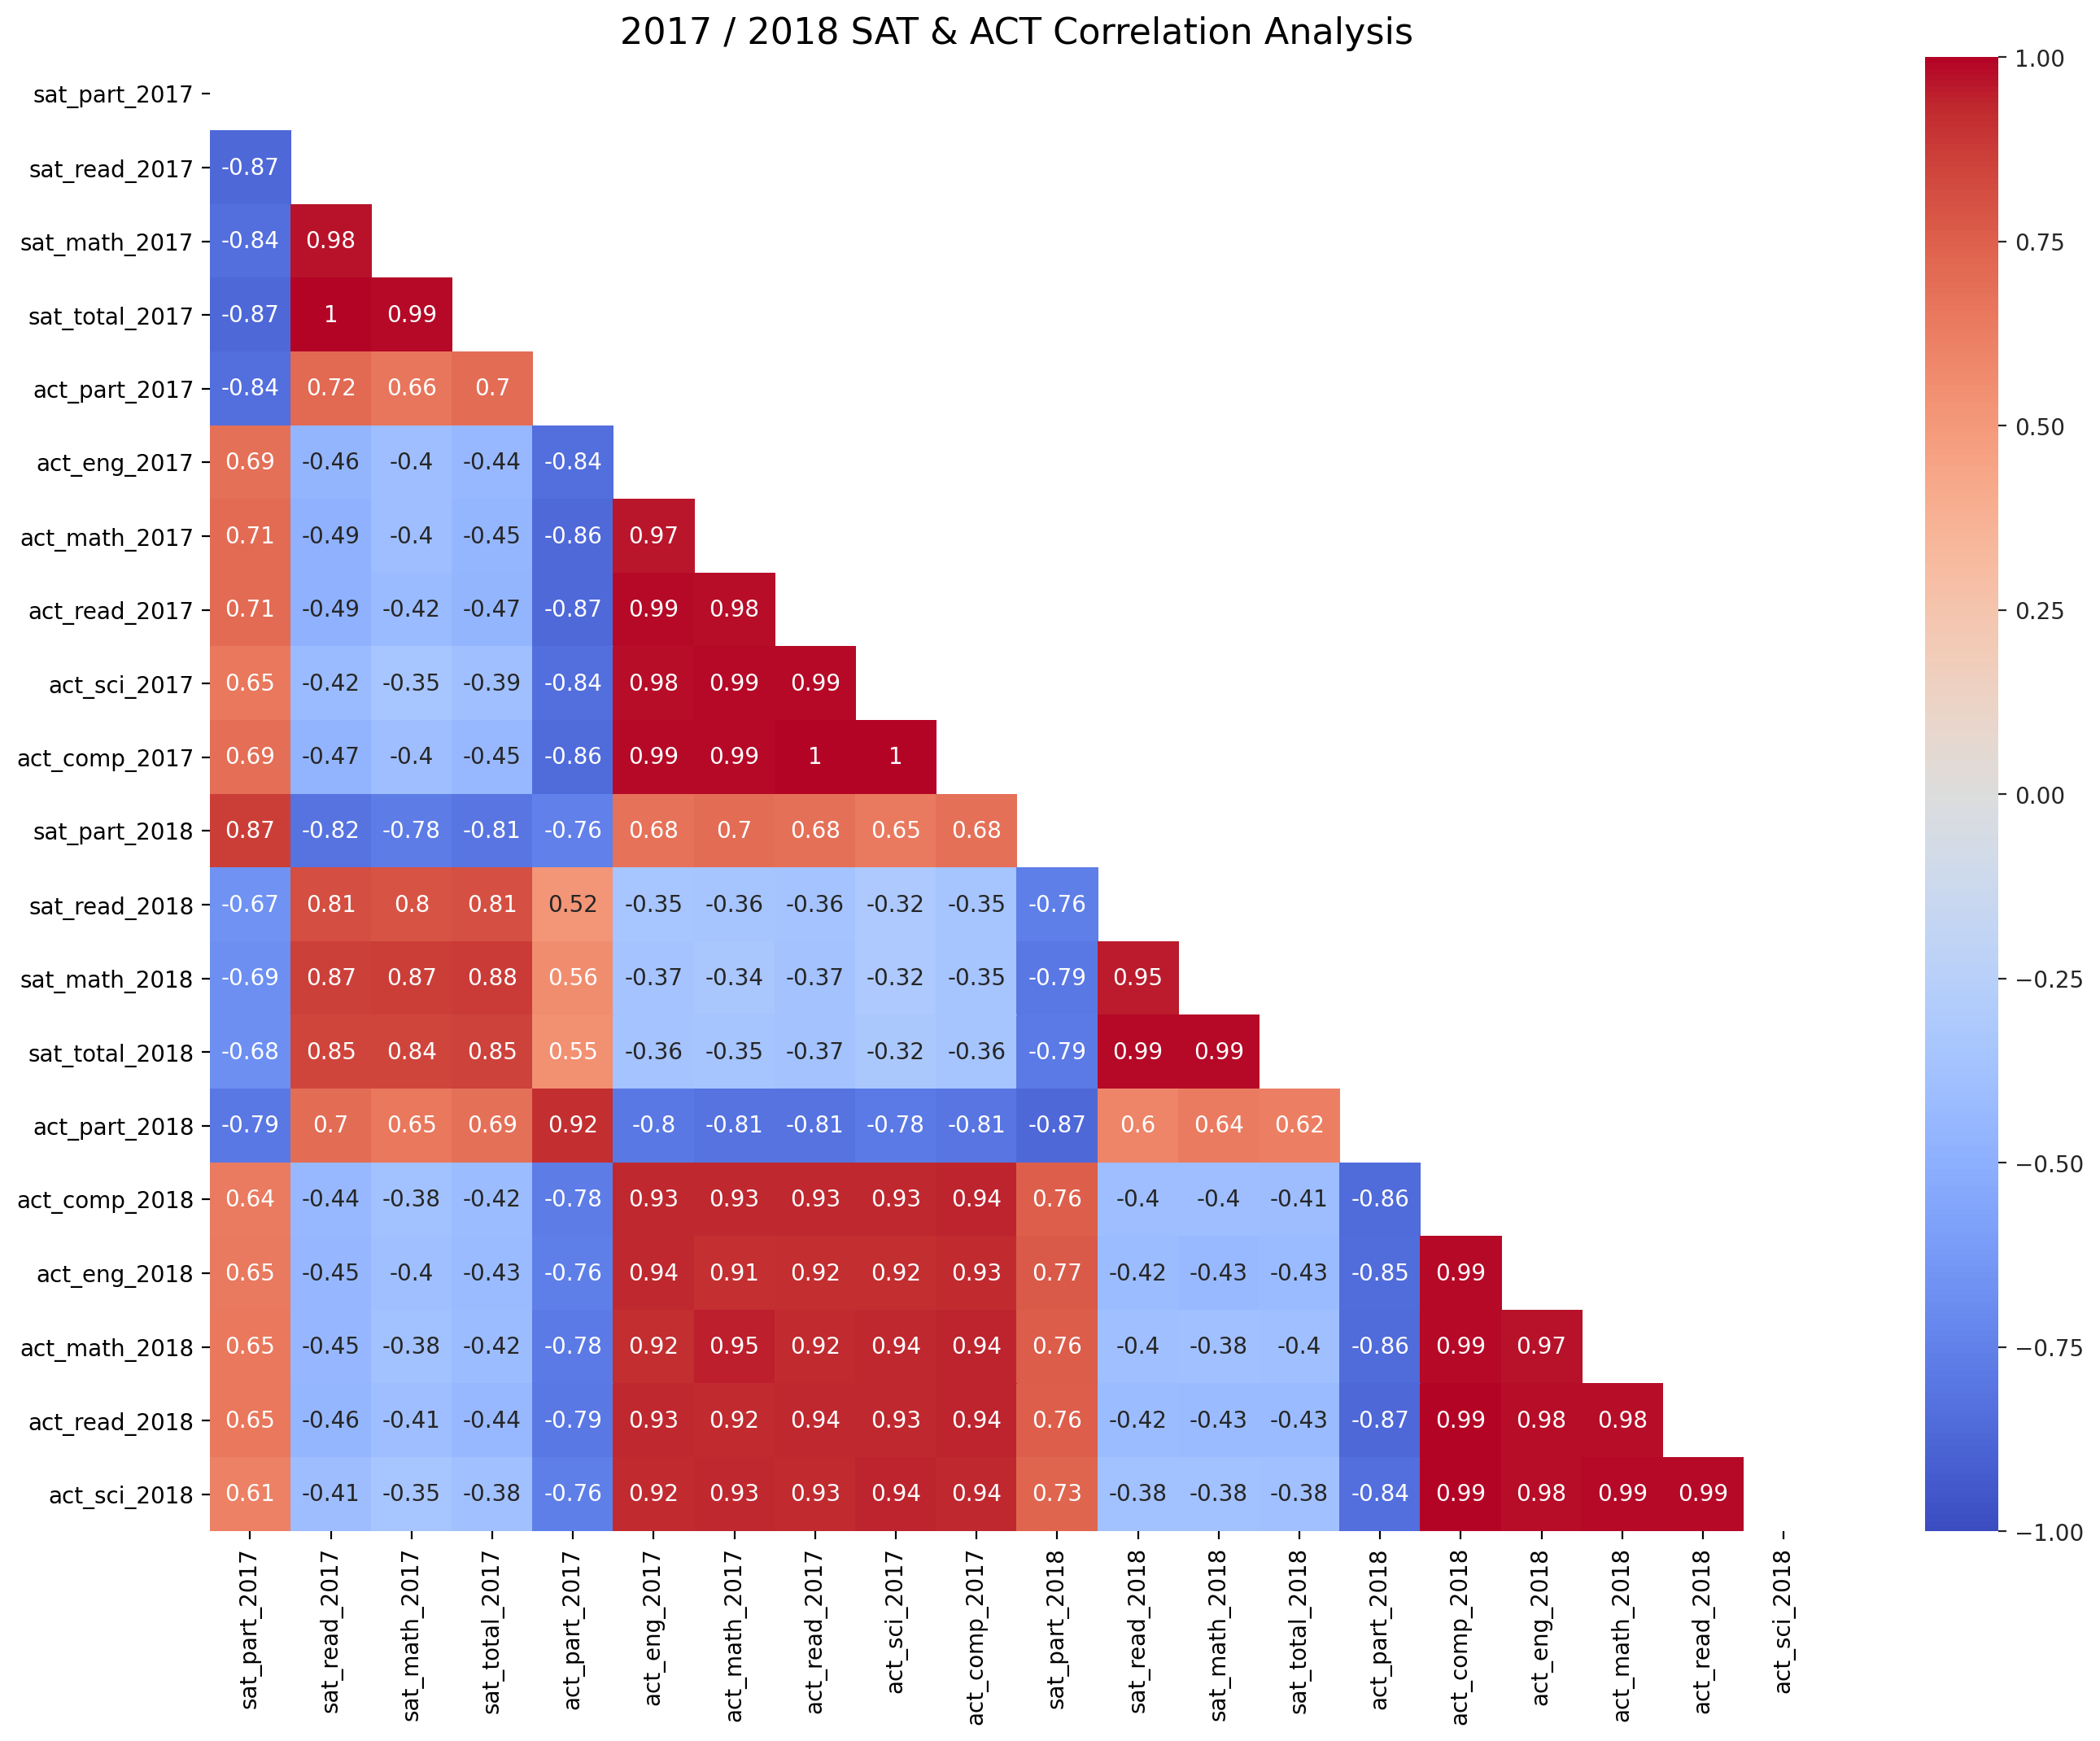

In [62]:
plt.figure(figsize=(16,12), dpi=200)
plt.title("2017 / 2018 SAT & ACT Correlation Analysis", fontsize=16)

matrix = np.triu(combined_final.corr())

with sns.axes_style("white"):
    sns.heatmap(combined_final.corr(), vmin=-1, vmax=1, center=0, linecolor='black', cmap="coolwarm", annot=True, mask=matrix)
    
plt.show()

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [63]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, figsize=(12,10)):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color="skyblue") # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

### Histogram: Participation Rates for SAT & ACT

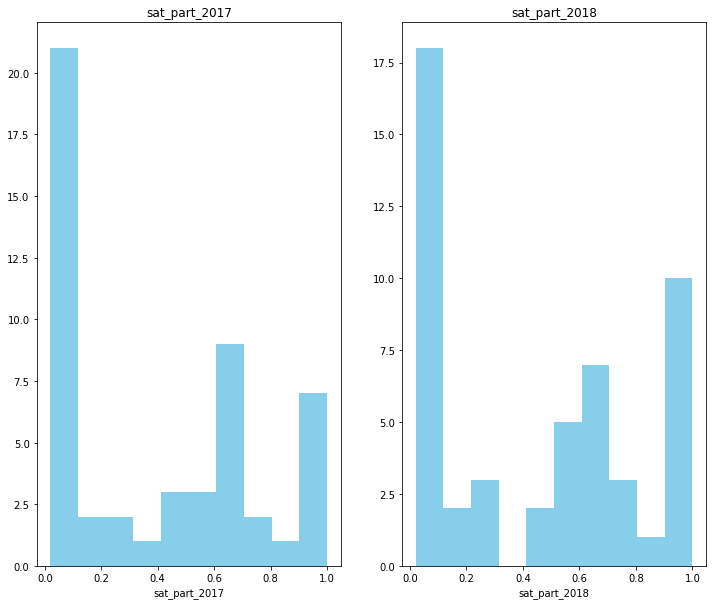

In [64]:
subplot_histograms(combined_final, ["sat_part_2017", "sat_part_2018"], ["sat_part_2017", "sat_part_2018"], ["sat_part_2017", "sat_part_2018"])

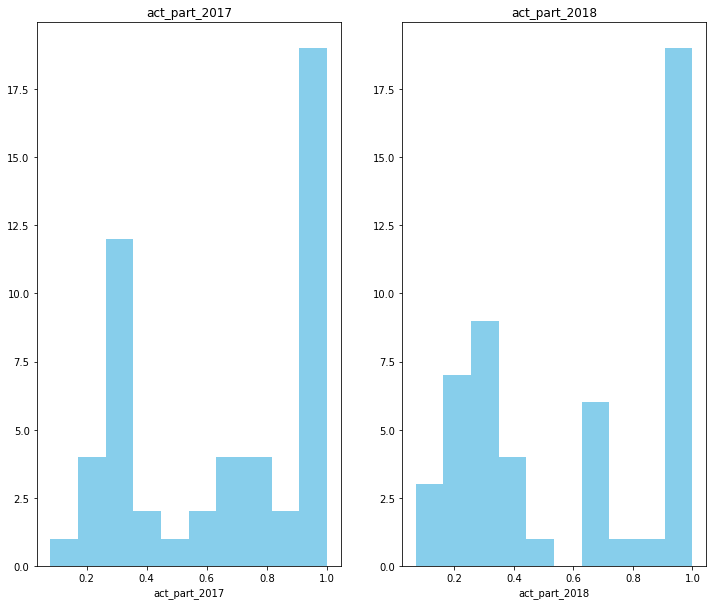

In [65]:
subplot_histograms(combined_final, ["act_part_2017", "act_part_2018"], ["act_part_2017", "act_part_2018"], ["act_part_2017", "act_part_2018"])

### Histogram: Math Scores for SAT & ACT

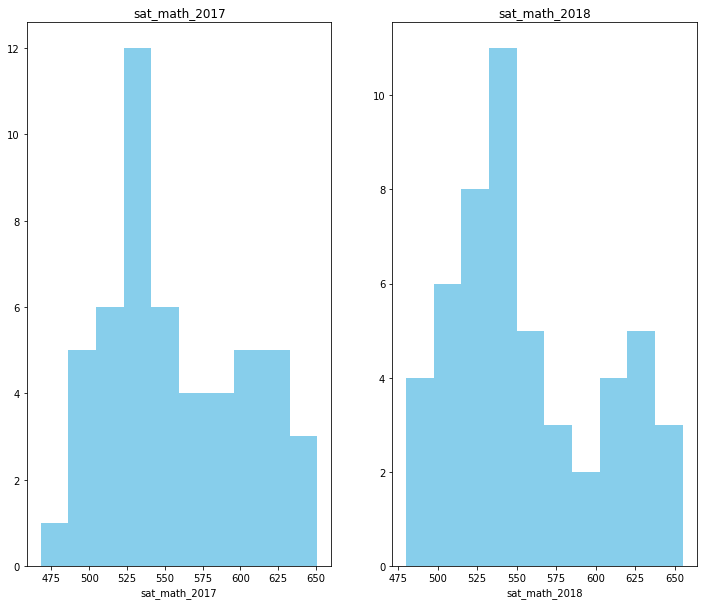

In [66]:
subplot_histograms(combined_final, ["sat_math_2017", "sat_math_2018"], ["sat_math_2017", "sat_math_2018"], ["sat_math_2017", "sat_math_2018"])

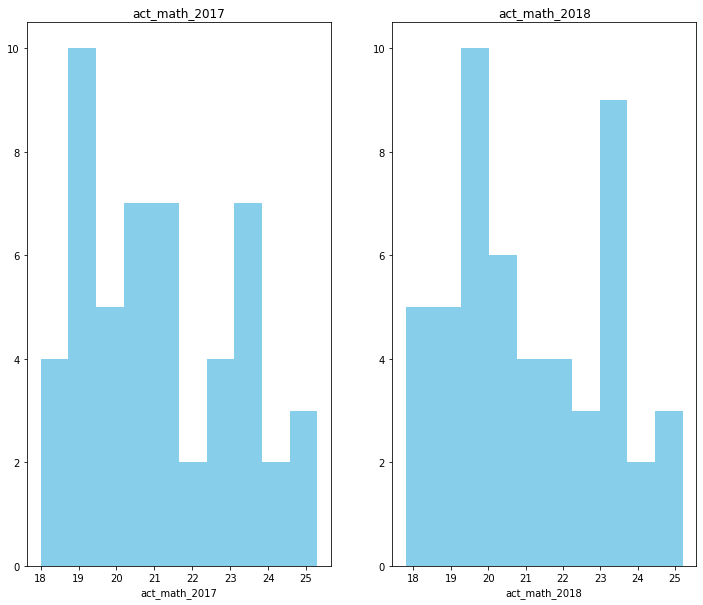

In [67]:
subplot_histograms(combined_final, ["act_math_2017", "act_math_2018"], ["act_math_2017", "act_math_2018"], ["act_math_2017", "act_math_2018"])

### Histogram: Reading / Verbal Scores for SAT & ACT

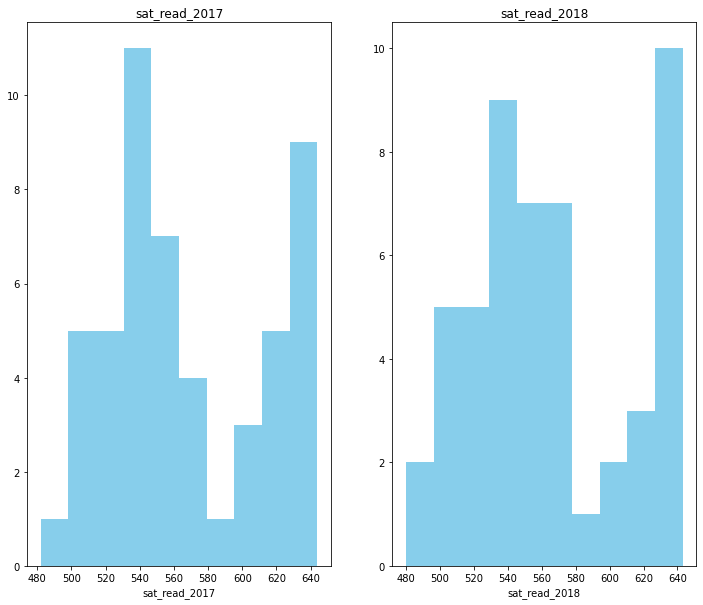

In [68]:
subplot_histograms(combined_final, ["sat_read_2017", "sat_read_2018"], ["sat_read_2017", "sat_read_2018"], ["sat_read_2017", "sat_read_2018"])

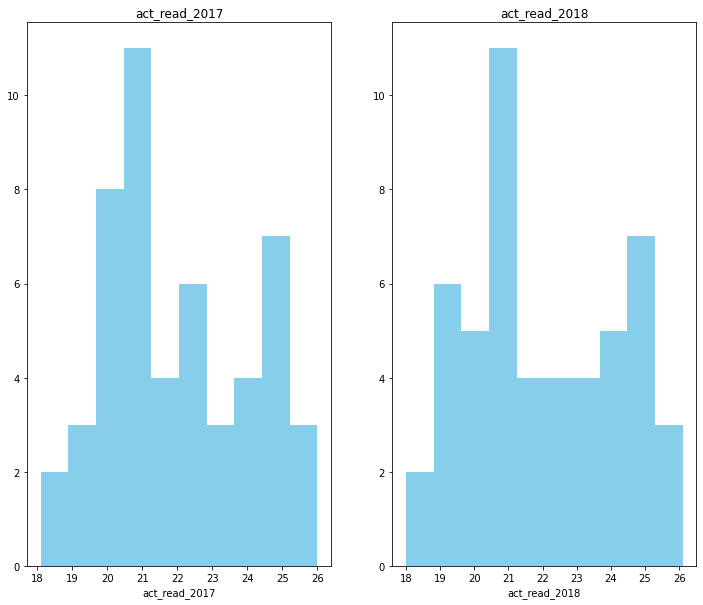

In [69]:
subplot_histograms(combined_final, ["act_read_2017", "act_read_2018"], ["act_read_2017", "act_read_2018"], ["act_read_2017", "act_read_2018"])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [70]:
def subplot_scatter(dataframe, list_of_columns, list_of_titles, figsize=(15,15)):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) 
    plt.subplots_adjust(hspace = 0.4)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate

    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].set_title(list_of_titles[i], fontsize=14)
        sns.regplot(x=dataframe[column[0]], y=dataframe[column[1]], ax=ax[i], scatter_kws={'alpha': 0.7}, color ="#3498db", line_kws={'color': 'red'})
    for axes in ax.flat[len(list_of_columns):]:
        axes.axis("off")
    pass
    plt.show()

In [71]:
scatter_columns = [["sat_math_2017", "act_math_2017"],
                   ["sat_read_2017", "act_read_2017"],
                   ["sat_total_2017", "act_comp_2017"],
                   ["sat_total_2017", "sat_total_2018"],
                   ["act_comp_2017", "act_comp_2018"]]

scatter_titles = ['SAT vs. ACT math scores for 2017',
                  'SAT vs. ACT verbal/reading scores for 2017',
                  'SAT vs. ACT total/composite scores for 2017',
                  'Total scores for SAT 2017 vs. 2018',
                  'Composite scores for ACT 2017 vs. 2018'
                 ]

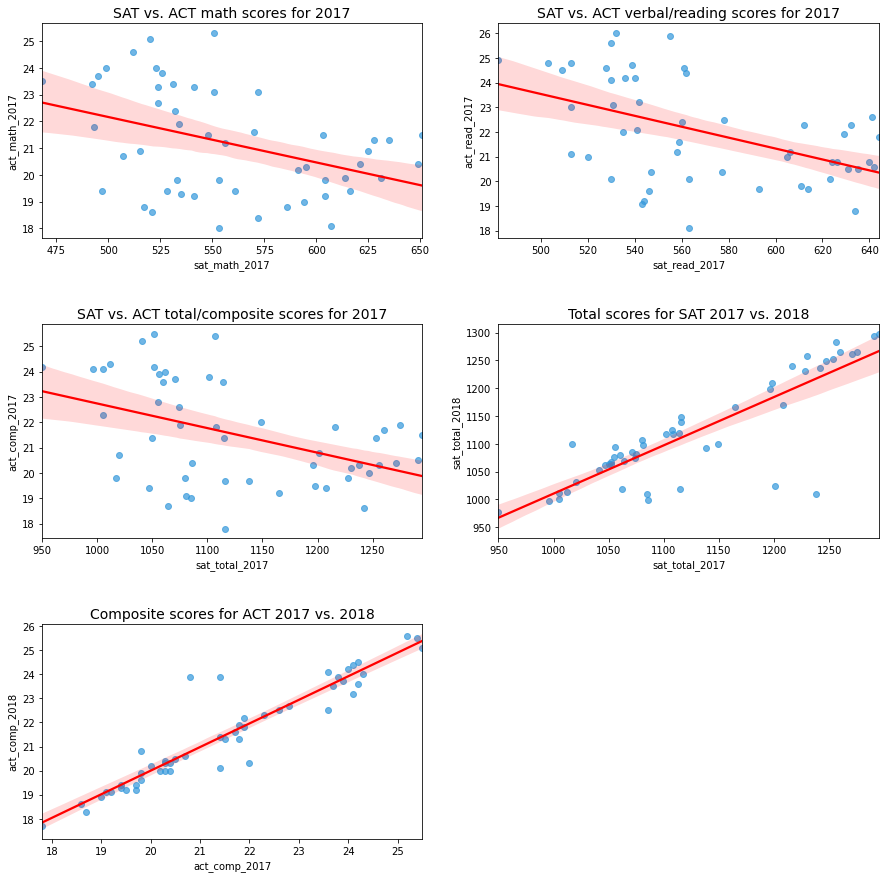

In [72]:
subplot_scatter(combined_final, scatter_columns, scatter_titles)

In [73]:
# Access outliers in sat_2017_total with masking
combined_final[(combined_final["sat_total_2018"] <1050) & (combined_final["sat_total_2017"] > 1100)][['state', 'sat_part_2017', 'sat_part_2018', 'sat_total_2017', 'sat_total_2018',
                      'act_part_2017', 'act_part_2018', 'act_comp_2017', 'act_comp_2018']]

,state,sat_part_2017,sat_part_2018,sat_total_2017,sat_total_2018,act_part_2017,act_part_2018,act_comp_2017,act_comp_2018
5,Colorado,0.11,1.00,1201,1025,1.00,0.30,20.8,23.9
13,Illinois,0.09,0.99,1115,1019,0.93,0.43,21.4,23.9
44,Utah,0.03,0.04,1238,1010,1.00,1.00,20.3,20.4


<a id='scatter_plot'></a>
### Scatter Plot Observations & Interpretations: 
- The above scatter plots indicate a strong positive correlation between the 
     - Total scores for SAT 2017 and SAT 2018, and 
     - Composite scores for ACT 2017 and ACT 2018
 
  This makes sense as we would expect test results from students of the same states to be generally consistent year-on-year.  
 
 However, there are several notable outliers for both scatter plots. Colorado and Illinois were among the states whose average SAT results fell by a significant amount from 2017 to 2018. Interestingly enough, both states also experienced the largest increase in SAT participation rates during the same time period, which is largely due to the fact that the SAT became mandatory for students in these states. Conversely, both their ACT participation rates fell by 60-70%, while their ACT composite scores increased by at least 10%. 
 
 The above combination of facts suggests that large changes in test participation rates have a significant negative impact on test scores, i.e increase in SAT participation rate results in decrease in average total score, and decrease in ACT participation rate causes an increase in average composite score. This is likely a product of self-selection bias where significantly higher test scores are observed among students choose to participate in the test, when it is not actually mandatory. These students might be more motivated to perform well or have access to more resources, and thus average test scores would go up. 


- A weak negative correlation was observed for the remaining 3 plots between:
 - Math scores for SAT 2017 and ACT 2017
 - Verbal/reading scores for SAT 2017 and ACT 2017
 - SAT Total Score 2017 and ACT Composite Score 2017
 
  The SATs and ACT have different assessment criteria; even the same subject has variations in the syllabus and format of examination. Thus, a strong performance in any component of the SAT does not necessitate an equally strong performance in the ACT

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

### Boxplot: 2017 & 2018 SAT and ACT Participation Rates

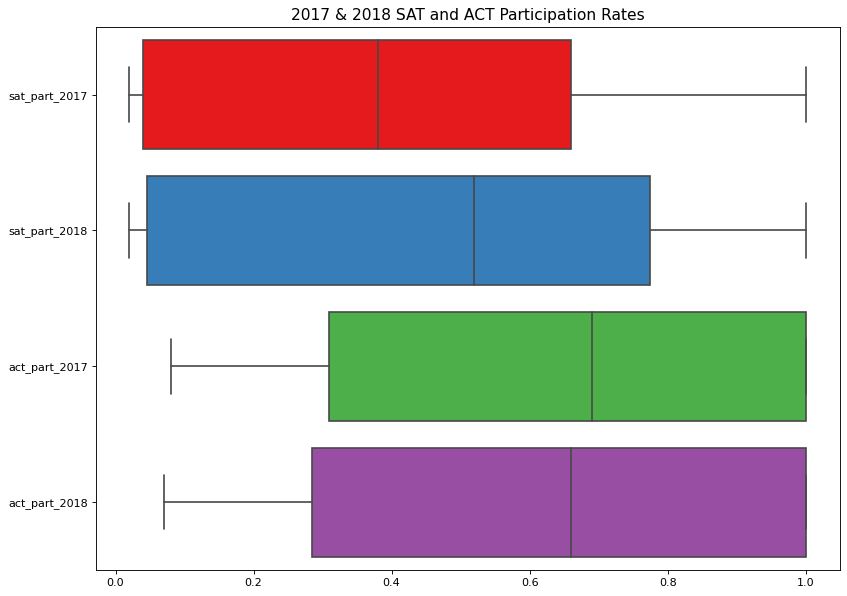

In [74]:
# SAT participation_rates
participation_rates = combined_final[["sat_part_2017", "sat_part_2018", "act_part_2017", "act_part_2018"]]
plt.figure(figsize=(12,9), dpi=80)
plt.title("2017 & 2018 SAT and ACT Participation Rates", fontsize=14)

with sns.axes_style("whitegrid"):
    sns.boxplot(
    data = participation_rates,
    saturation = 2,
    palette="Set1",
    orient = "h"
    )
plt.show()

#### Observations: 
- No outliers were spotted from the boxplots
- The SAT participation rates for both years were distributed over a wider range as compared to the ACT participation rates
- The median SAT participation rate increased from 0.38 to 0.52 over the year while that of ACT dropped from 0.69 to 0.66. The huge increase in SAT participants may be explained by the sudden influx of SAT participants in 2018. 

### Boxplot: 2017 & 2018 SAT Scores

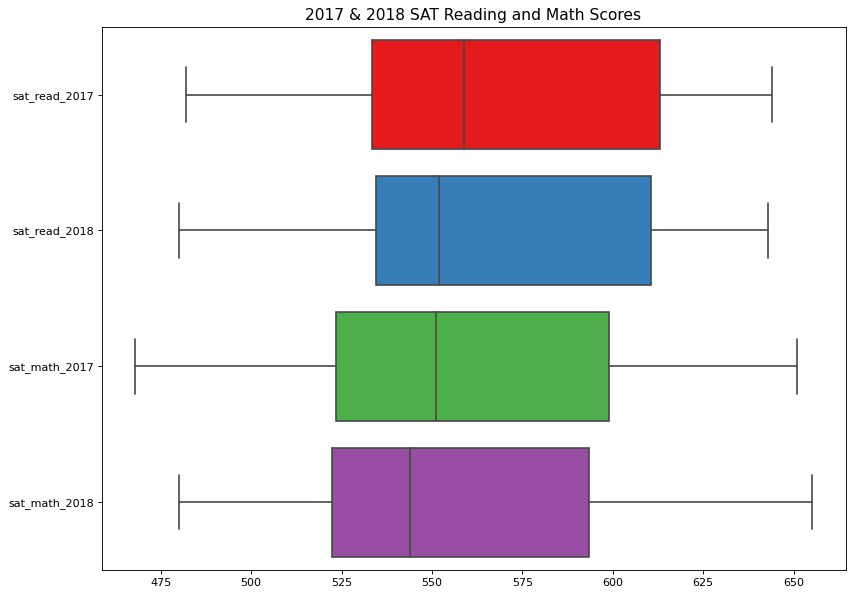

In [75]:
# SAT Subject Scores
sat_subject_scores = combined_final[["sat_read_2017", "sat_read_2018", "sat_math_2017", "sat_math_2018"]]
plt.figure(figsize=(12,9), dpi=80)
plt.title("2017 & 2018 SAT Reading and Math Scores", fontsize=14)

with sns.axes_style("whitegrid"):
    sns.boxplot(
    data = sat_subject_scores,
    saturation = 2,
    palette="Set1",
    orient = "h"
    )
plt.show()

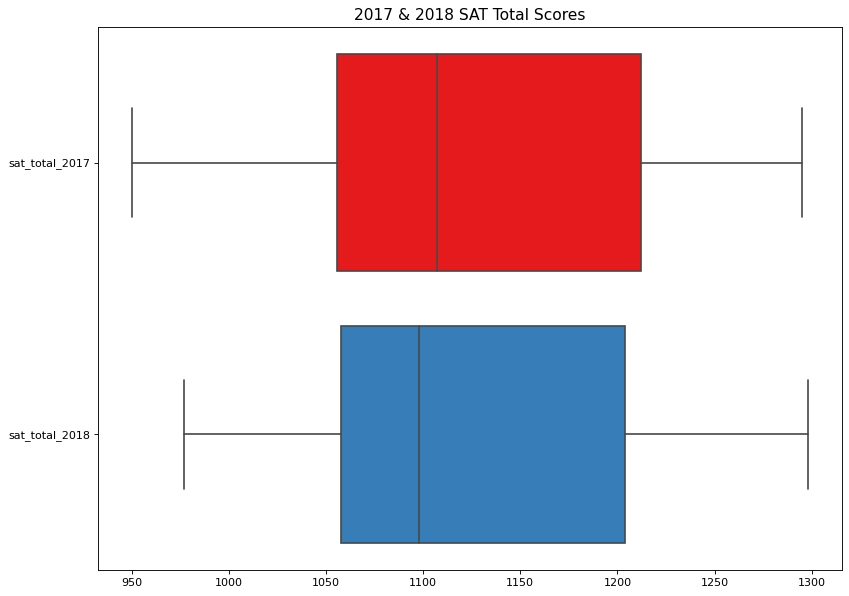

In [76]:
# SAT total scores
sat_total_scores = combined_final[["sat_total_2017", "sat_total_2018"]]
plt.figure(figsize=(12,9), dpi=80)
plt.title("2017 & 2018 SAT Total Scores", fontsize=14)

with sns.axes_style("whitegrid"):
    sns.boxplot(
    data = sat_total_scores,
    saturation = 2,
    palette="Set1",
    orient = "h"
    )
plt.show()

### Observation: 
- No outliers were observed from either of the boxplots
- The interquartile range of SAT Math scores is lower than that of the reading scores, while the median math scores of 544 - 551 is lower than the median reding scores (552-559)
- This may indicate that students tend to perform better in reading as opposed to Math 

### Boxplot: 2017 & 2018 ACT Scores

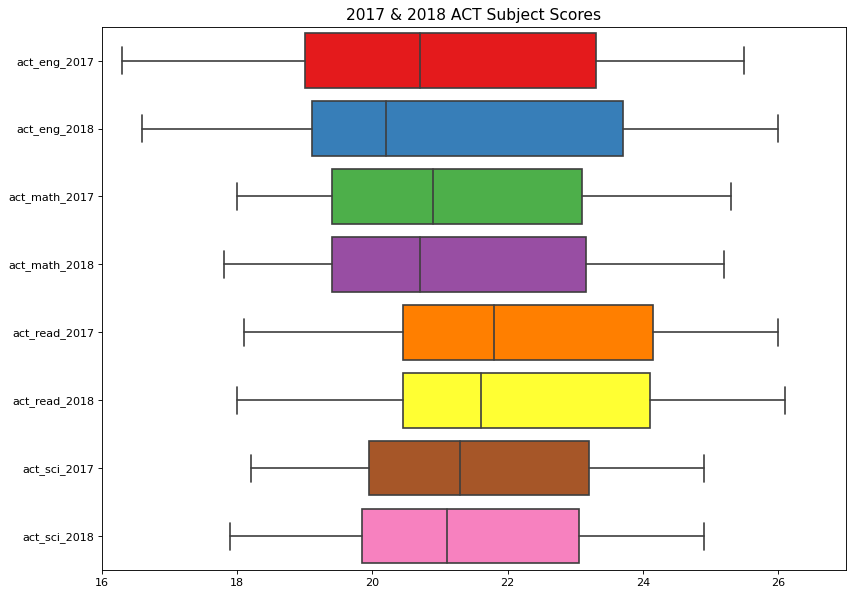

In [77]:
# ACT subject scores
act_subject_scores = combined_final[["act_eng_2017", "act_eng_2018", "act_math_2017", "act_math_2018", "act_read_2017", "act_read_2018", "act_sci_2017", "act_sci_2018" ]]
plt.figure(figsize=(12,9), dpi=80)
plt.title("2017 & 2018 ACT Subject Scores", fontsize=14)
plt.xlim(16, 27)

with sns.axes_style("whitegrid"):
    sns.boxplot(
    data = act_subject_scores,
    saturation = 2,
    palette="Set1",
    orient = "h"
    )
    
plt.show()

### Observation: 
- No outliers were observed from any of the boxplots
- The English scores also have the widest range of values. 
- The ACT English scores has the lowest median score compared to the other subjects for both year, suggesting that students tend to perform the worst in English compared to the other subjects.
- Overall, there was a decrease in the median score of all ACT subjects in 2018. 

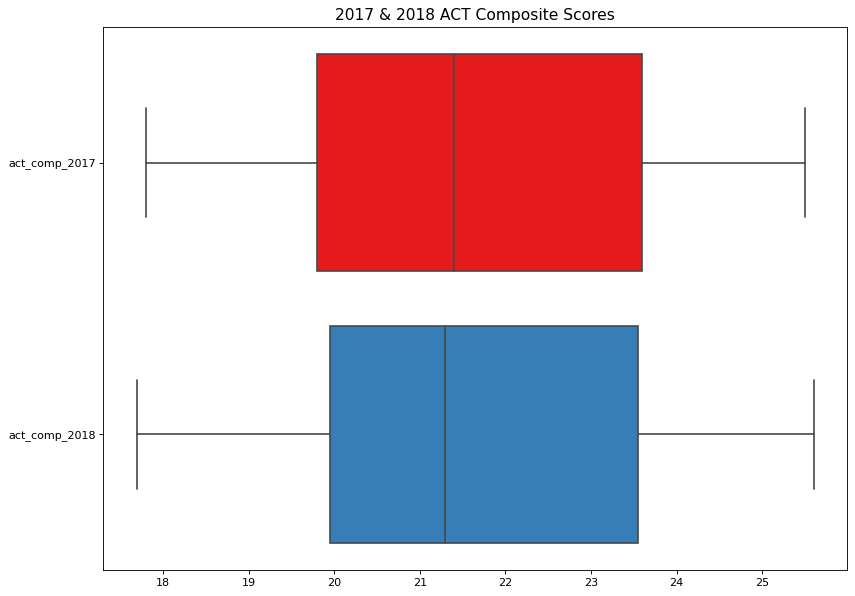

In [78]:
# ACT composite scores
act_comp_scores = combined_final[["act_comp_2017", "act_comp_2018"]]
plt.figure(figsize=(12,9), dpi=80)
plt.title("2017 & 2018 ACT Composite Scores", fontsize=14)

with sns.axes_style("whitegrid"):
    sns.boxplot(
    data = act_comp_scores,
    saturation = 2,
    palette="Set1",
    orient = "h"
    )
plt.show()

### Observation 
- No outliers were observed from either of the boxplots.
- In both 2017 and 2018, the median composite score and interquartile range are nearly identical, indicating consistency in each state's test scores

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### Participation Rates Scatter Plots

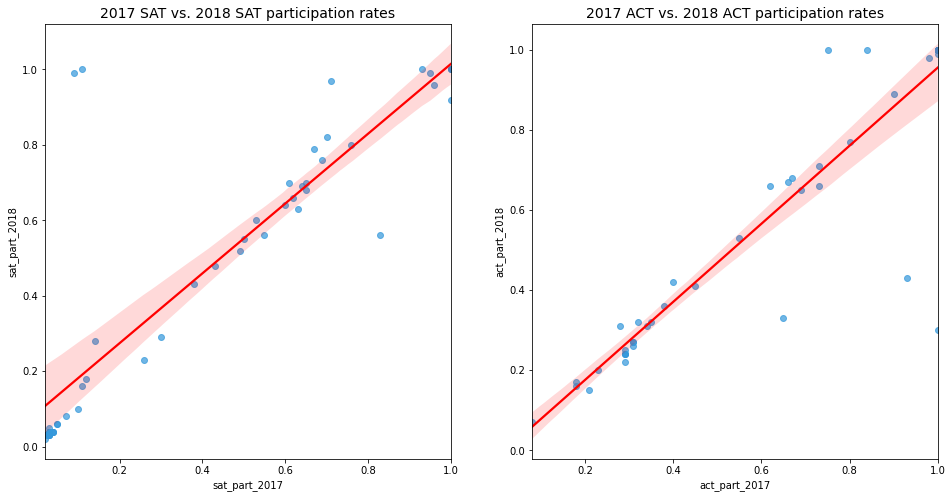

In [79]:
part_rates = [["sat_part_2017", "sat_part_2018"], ["act_part_2017", "act_part_2018"]]
part_titles = ['2017 SAT vs. 2018 SAT participation rates', '2017 ACT vs. 2018 ACT participation rates']

subplot_scatter(combined_final, part_rates, part_titles, figsize=(16,8))

Several interesting trends were noted in the above scatter plots on SAT and ACT participation rates, namely the states of Colorado and Illinois whose 2017 SAT participation rates jumped from a measely 11% and 9% to 100% and 99% in 2018 respectively. This was accompanied by a massive reduction in Colorado's ACT participation rates from 100% to 30%, and 93% to 43% for Illinois' during the same time period. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

### SAT Distributions

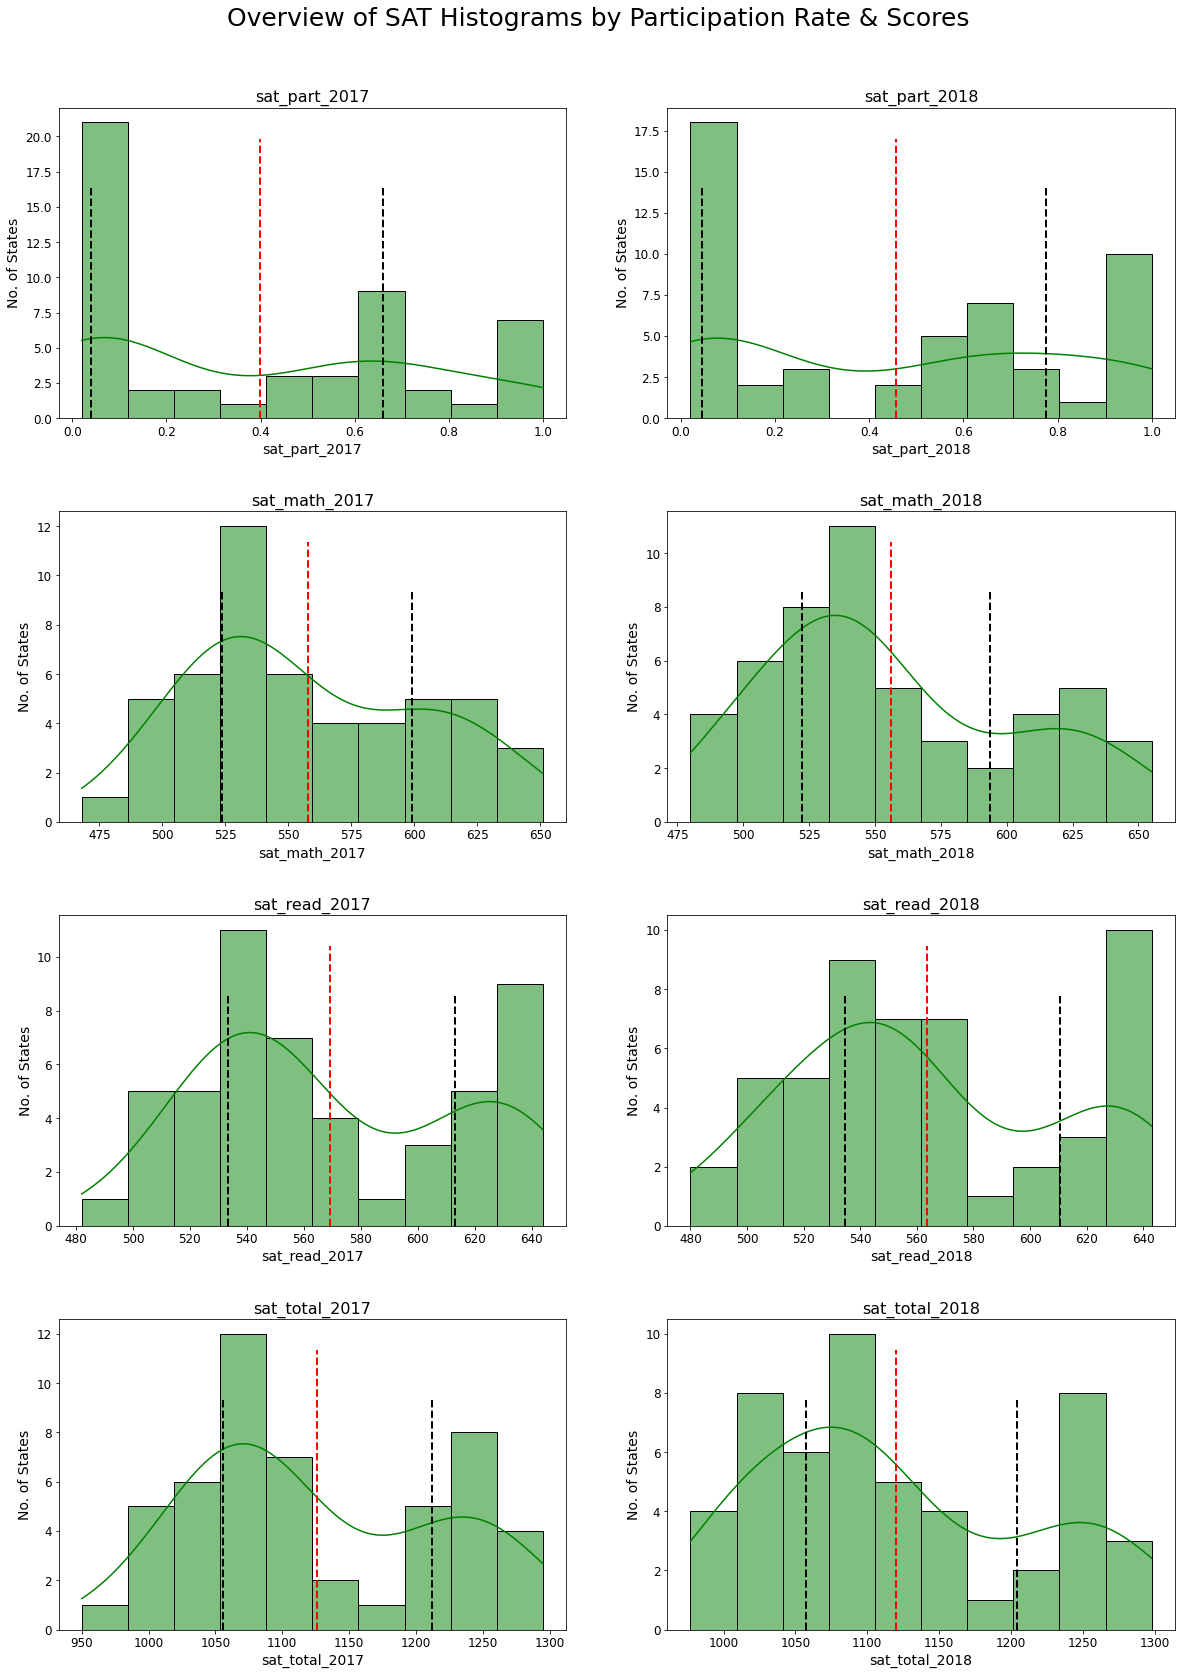

In [80]:
sat_column_variables = ["sat_part_2017","sat_part_2018","sat_math_2017", "sat_math_2018", 
                        "sat_read_2017", "sat_read_2018", "sat_total_2017", "sat_total_2018"] 
            
ax = plt.figure(figsize=(20,28))

plt.suptitle("Overview of SAT Histograms by Participation Rate & Scores", fontsize = 25, y=0.93)
for i, col in enumerate(sat_column_variables):
    ax.add_subplot(4, 2, 1+i) 
    sns.histplot(combined_final[col], bins=10, kde=True, color='green', )
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel=col, fontsize=14)
    plt.ylabel(ylabel= 'No. of States' , fontsize=14)
    plt.title(col, fontsize=16)
    plt.axvline(np.mean(combined_final[col]), 0, 0.9, linestyle='--', color='red', linewidth=2)    # plot mean line in red 
    plt.axvline(np.quantile(combined_final[col], 0.25), 0, 0.75, linestyle='--', color='black', linewidth=2) #25th percentile
    plt.axvline(np.quantile(combined_final[col], 0.75), 0, 0.75, linestyle='--', color='black', linewidth=2) #75th percentile
    plt.subplots_adjust(hspace = 0.3)

### SAT Descriptive Statistics 
#### Participation Rate 
From the histograms above, we note that largest bins for both 2017 and 2018 SAT were in the 0-10% participation range. The 2017 SAT only had 7 states with 90-100% participation although that number increased to 10 states in 2018. Listed below are the key statistical values for 2017 and 2018 respectively: 
- Mean participation rates: 40% and 46% 
- Standard deviations of participation rates: 35% and 37% 
- Median participation rates: 38% and 52% 

By comparing the mean and median values, the 2017 SAT participation rate distribution is slightly right-skewed while the 2018 SAT distribution is left-skewed 

#### Math Scores
In both 2017 and 2018, a significantly large proportion of U.S states had mean Math scores below the national average (32 out of 51 states in both years). Key statistical values for 2017 and 2018 respectively: 
- Mean Math scores: 558 and 557
- Standard deviations of math scores: 47 and 48
- Median Math scores: 551 and 544 

The distributions for both years are slightly right-skewed. 

#### Reading Scores
A similar scenario is also noted for the reading scores in both 2017 and 2018 where a significantly large proportion of U.S states had mean reading scores below the national average (2017: 33 states, 2018: 30 states). Key statistical values for 2017 and 2018 respectively: 
- Mean reading scores: 569 and 564
- Standard deviations of reading scores: 46 and 48
- Median reading scores: 559 and 552 

The distributions for both years are right-skewed. 

#### Total Scores
With both the math and reading scores featuring large numbers of states below the average, it is no surprise that the mean SAT score of a large proportion of states are also below the national average. 
 Key statistical values for 2017 and 2018 respectively: 
- Mean total scores: 1126 and 1120
- Standard deviations of total scores: 92 and 94
- Median total scores: 1107 and 1098 

The SAT total scores distributions for both years are right-skewed. 

### ACT Distributions

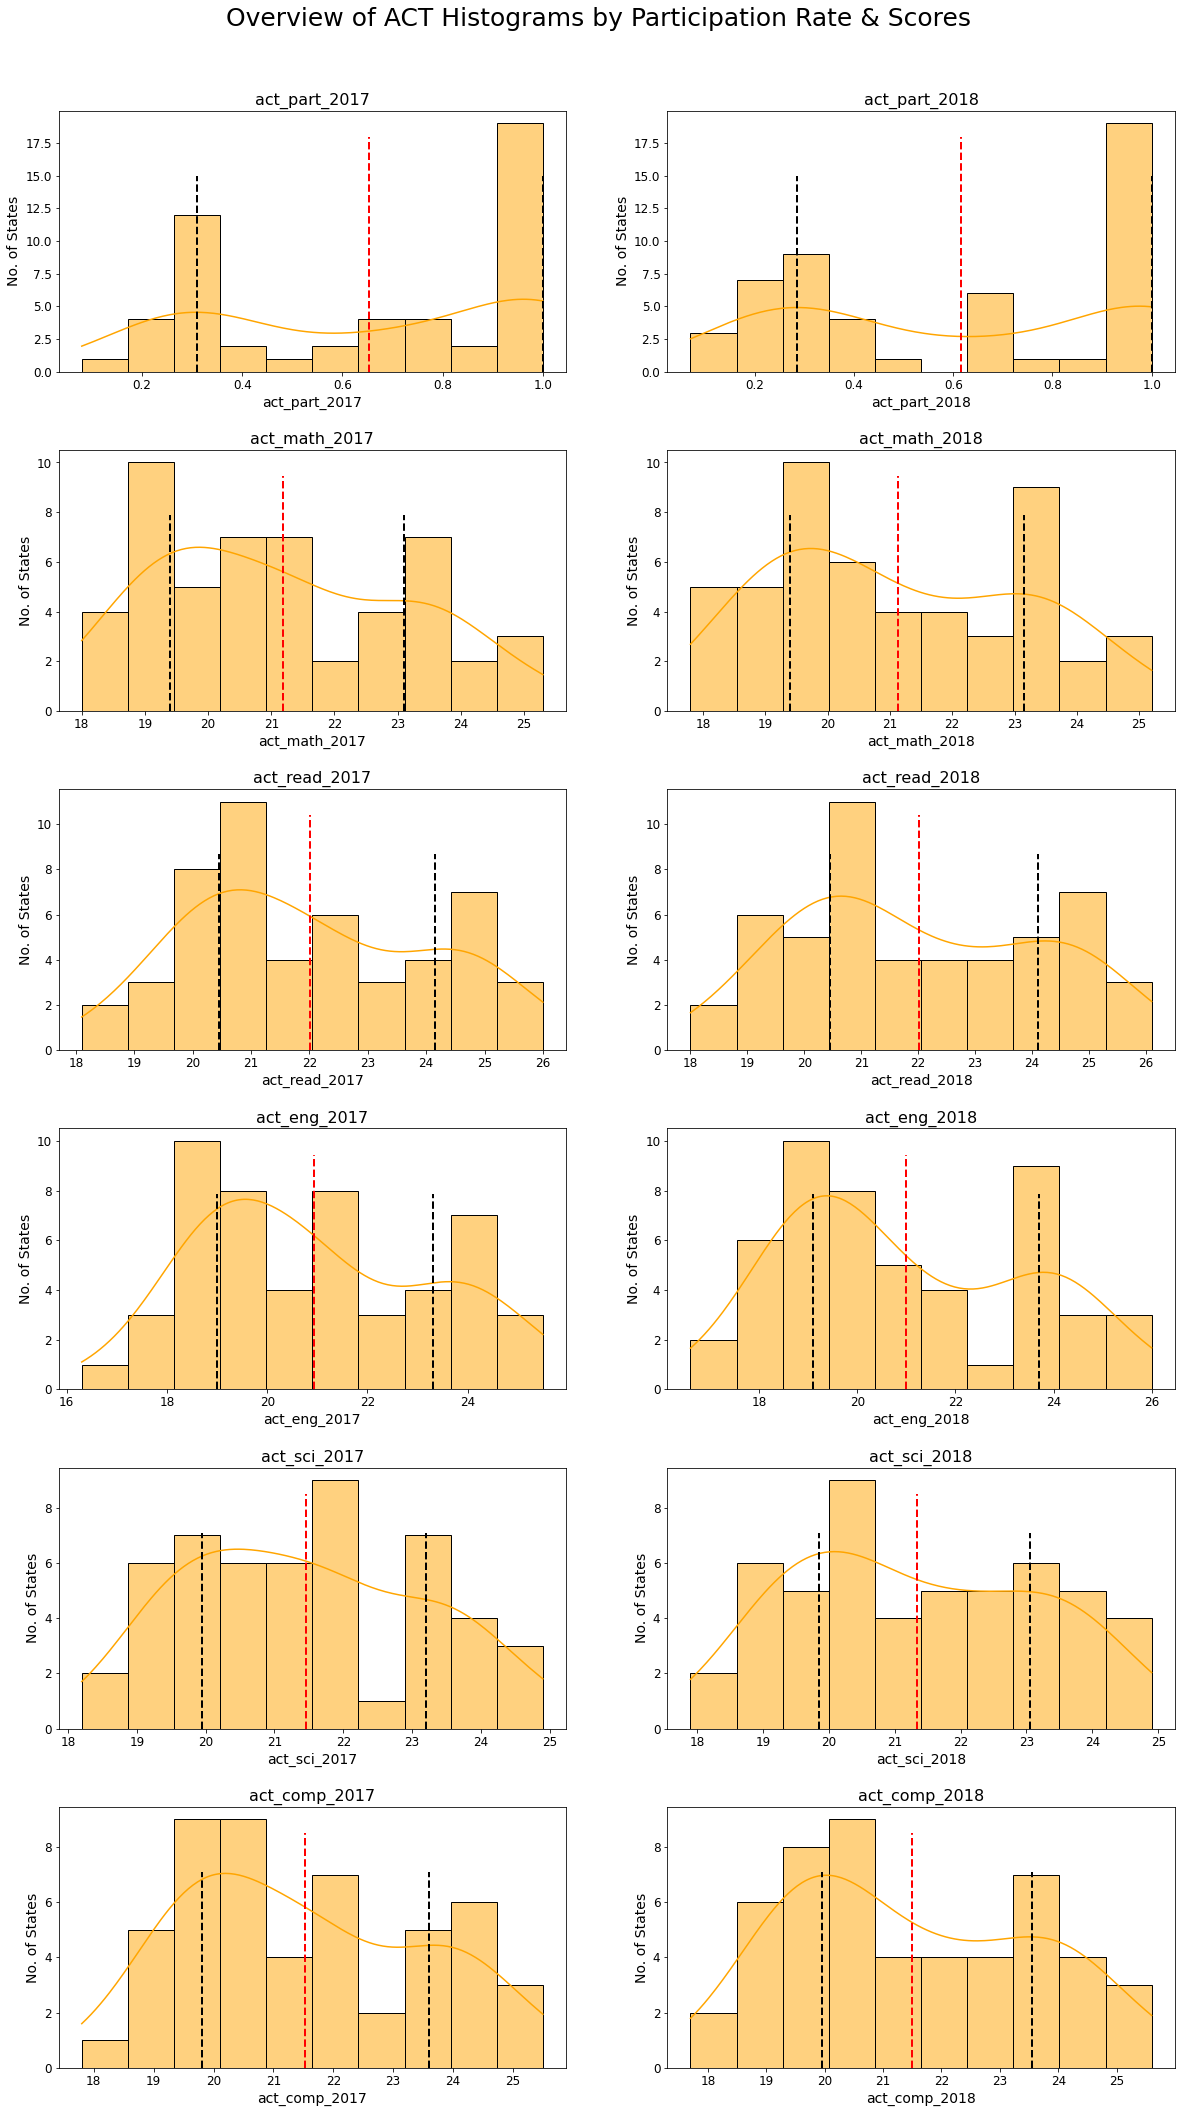

In [81]:
act_column_variables = ["act_part_2017", "act_part_2018", "act_math_2017", "act_math_2018", "act_read_2017", "act_read_2018", 
                        "act_eng_2017", "act_eng_2018","act_sci_2017", "act_sci_2018", "act_comp_2017", "act_comp_2018"]

ax = plt.figure(figsize=(20,36))

plt.suptitle("Overview of ACT Histograms by Participation Rate & Scores", fontsize = 25, y=0.92)
for i, col in enumerate(act_column_variables):
    ax.add_subplot(6, 2, 1+i) 
    sns.histplot(combined_final[col], bins=10, kde=True, color='orange', )
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel=col, fontsize=14)
    plt.ylabel(ylabel= 'No. of States' , fontsize=14)
    plt.title(col, fontsize=16)
    plt.axvline(np.mean(combined_final[col]), 0, 0.9, linestyle='--', color='red', linewidth=2)    # plot mean line in red 
    plt.axvline(np.quantile(combined_final[col], 0.25), 0, 0.75, linestyle='--', color='black', linewidth=2) #25th percentile
    plt.axvline(np.quantile(combined_final[col], 0.75), 0, 0.75, linestyle='--', color='black', linewidth=2) #75th percentile
    plt.subplots_adjust(hspace = 0.3)

### ACT Descriptive Statistics 
#### Participation Rate 
From the histograms above, we note that largest bins for both 2017 and 2018 ACT occurred within the 90-100% participation range, with 20 states in 2017 and 19 states in 2018. Listed below are the key statistical values for 2017 and 2018 respectively: 
- Mean participation rates: 65% and 62% 
- Standard deviations of participation rates: 32% and 34% 
- Median participation rates: 69% and 66% 
By comparing the mean and median values, the distribution for the ACT participation rate in both years is left-skewed. 

#### Math Scores
In both 2017 and 2018, slightly over half the U.S states had mean Math scores below the national average (2017: 26 states, 2018: 27 states). Key statistical values for 2017 and 2018 respectively: 
- Mean Math scores: 21.2 and 21.1
- Standard deviations of Math scores: 2.0 and 2.0
- Median Math scores: 21.0 and 20.7
The distributions for both years are slightly right-skewed. 

#### Reading Scores
A similar scenario is also noted for the reading scores in both 2017 and 2018 where slightly over half the U.S states had mean reading scores below the national average (2017: 27 states, 2018: 28 states). Key statistical values for 2017 and 2018 respectively: 
- Mean reading scores: 22.0 and 22.0
- Standard deviations of reading scores: 2.1 and 2.2
- Median reading scores: 21.8 and 21.6 
The distributions for both years are slightly right-skewed. 

#### English Scores
Around half the states had a mean English score below the national average (2017: 26 states, 2018: 29 states). Key statistical values for 2017 and 2018 respectively: 
- Mean English scores: 20.9 and 21.0
- Standard deviations of English scores: 2.4 and 2.4
- Median English scores: 20.7 and 20.2
Although the distributions for both years are right-skewed, the skewness in 2018 was more significant compared to 2017. 

#### Science Scores
Around half the states had a mean Science score below the national average (26 states in both years). Key statistical values for 2017 and 2018 respectively: 
- Mean Science scores: 21.5 and 21.3
- Standard deviations of Science scores: 1.7 and 1.9
- Median Science scores: 21.3 and 21.1
The distributions for both years are slightly right-skewed. 

####  Composite Scores
With all 4 subject category scores featuring over half the states below the average, it is equally unsurprising that the mean ACT composite score over half the states are also below the national average. 
 Key statistical values for 2017 and 2018 respectively: 
- Mean composite scores: 21.5 and 21.5
- Standard deviations of composite scores: 2.0 and 2.1
- Median composite scores: 21.4 and 21.3 

The ACT composite scores distributions for both years are slightly right-skewed. 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

By observing the kde plots of all the above histograms, it is evident that none of these variables follow a normal distribution. In fact, some of the distributions appear to be bi-modal (i.e ACT Science where the peaks differ by at least twice the standard deviation)

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

This assumption does not hold true for either of these variables. For a distribution to be considered normal, the data set must follow a bell-shaped symmetrical curve centered around the mean. The mean, median and mode have to be equal as well. In addition, normal distributions follow the 68-95-99.7 empirical rule (i.e 68% of the distribution within 1 standard deviation of the mean, 95% within 2 standard deviations and 99.7% within 3 standard deviations)

##### Math

The SAT math score distributions does appear to have normal tendencies as the peak tends toward the mean (as depicted by the red dotted line). Perhaps when participation rates are more stable and with a large margin of error, we might be able to make estimates from these. The ACT math distributions are both right-skewed and given the requirements above for a normal distribution, estimates made here are most likely to be inaccurate. 

##### Reading

The SAT reading distributions are both right-skewed and given the requirements above for a normal distribution, estimates made here are most likely to be inaccurate. The ACT reading score distributions does appear to have normal tendencies as the peak tends toward the mean (as depicted by the red dotted line). Although they are both slightly right-skewed, the scores have a higher density in the middle. Perhaps when participation rates are more stable and with a large margin of error, we might be able to make estimates from these. 

##### Participation Rates

The participation rates are the most unlikely to be normally distributed, given that the spikes in frequency are not centralised. This is a result of mandatory participation in either ACT or SAT in certain states where 100% participation is expected. Moreover, there were still a number of states in 2017/2018 which did not require their students to take either of these standardised tests. Thus any estimates taken here would be unreliable. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017.

If we were to consider the participation rates with the exclusion of the lower-most and upper-most ends of the histogram bins, we might be able to make a case for a normal distribution for the remaining states. Any estimates should be strictly contained to these remaining states as it does visually appear to be normal. 

For the states with extremelly low or high participation rates, we should consider other factors such as the state requirements for standardised tests. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

With the yearly changes in participation rates, the population size of students taking these tests would fluctuate. In addition, there are also cases of students taking both tests and as a result, participation rates are not independent, not mutually exclusive and can contain overlapping portions. Thus it is unlikely that we can conduct statistical inferences that rely on the characteristics of a normal distribution or the Central Limit Theorem. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: 
It would not be appropriate to make direct comparisons between SAT and ACT math scores because both tests focus on testing different concepts (eg. ACT has higher weightage on geometry) and have different grading systems. 

Moreover, the correlation heatmap above shows a weak correlation between the SAT and ACT math scores, suggesting that a student's performance in either test would not significantly impact their performance in the other test. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

To study the trends noted in the [earlier scatter plot analysis](#Participation-Rates-Scatter-Plots) on the states of Colorado and Illinois, external research was done and it revealed that changes in state education policies were responsible for these huge shifts in rates. 

#### Colorado 
Colorado's state Department of Education mandated that its students be required to take the SAT instead of the ACT starting from 2016. However, this was postponed to the following spring (2017) due to complaints by school district superintendents that there was insufficient preparation time for students (<a href='https://durangoherald.com/articles/1951-colorado-postpones-switch-to-sat-tests-to-spring-2017'>source</a>). This is evident from Colorado's 2017 SAT participation rate of 11%, while the state maintained its 100% ACT rate that year. 

In 2018, the SAT participation rate surged to 100% while the ACT rate slumped to 30%. Considering that every student took the SAT, a 30% ACT rate is a relatively high number and it was most likely abscribed to students taking both tests to increase their opportunities to do well, and to have the flexibility of more test dates to choose from (<a href='https://blog.prepscholar.com/do-you-need-to-take-both-the-act-and-sat#:~:text=The%20most%20common%20reason%20students,exceptions%20without%20trying%20both%20tests.'>source</a>).  


#### Illinois
Similarly, the state of Illinois officially elected to transition its high school students from the ACT to the SAT with effect from 2017, and was offering the tests to students without additional charges, while students who preferred to take the ACT would have to foot the bill themselves. Despite that, there was still a 93% ACT participation rate in 2017 and it has been reported that there would likely have been a more substantial decrease but for certain districts and schools who insisted on paying for the test (<a href='https://www.chicagotribune.com/news/breaking/ct-met-illinois-act-test-scores-20181016-story.html'>source</a>). 

This is understandable as schools and institutions are large organisations that require time to roll out large-scale changes to accommodate the new syllabus and assessment criteria. After all, Illinois had been associated with the ACT since 2001 so there would naturally be some form of inertia. Further uncertainty was sparked by a protest launched by the ACT with state procurement officials, which could have potentially restarted the entire competitive process (<a href='https://www.bnd.com/news/local/article50939170.html'>source</a>). It is likely that this triggered a 'flight-to-safety' mentality among educators and students alike, who would have pursued the more familiar option of the ACT. Even so, 9% of students sat for the SAT that year, possibly in hopes of bolstering their chances of admissions to college or simply for a "morale boost" (<a href='https://chicago.suntimes.com/2018/3/11/18420507/five-juniors-at-whitney-young-high-school-score-perfect-36-on-act'>source</a>).

We do see this trend continuing in 2018 with a participation rates of 99% in the SAT in tandem with a relatively high 43% in the ACT. This was a result of some Illinois schools opting to offer both the ACT and SAT exams to their students (<a href='https://www.chicagotribune.com/news/breaking/ct-met-illinois-act-test-scores-20181016-story.html'>source</a>). 


In [82]:
combined_final.loc[[5, 13]][['state','sat_part_2017', 'sat_part_2018', 'act_part_2017', 'act_part_2018']]

,state,sat_part_2017,sat_part_2018,act_part_2017,act_part_2018
5,Colorado,0.11,1.00,1.00,0.30
13,Illinois,0.09,0.99,0.93,0.43


#### Considerations for states which do not require SAT or ACT  participation, and do not provide fee waivers 
Although the scatter plots do reveal outliers such as Colorado and Illinois due to changes in state legislation, we can also dig deeper to identify states that do not offer their students fee waivers for these tests, which may be a deterrent for students whose families fall under certain income thresholds. 

- States that require the SAT or ACT: (<a href='https://magoosh.com/hs/sat/states-that-require-the-act-or-sat/'>source</a>)

- States that provide the SAT for free: (<a href='https://magoosh.com/hs/sat/states-provide-sat-free/'>source</a>)

- States that provide the ACT for free: (<a href='https://magoosh.com/hs/act/states-provide-act-free/'>source</a>)

In [83]:
states_requiring_sat_or_act = ['Alabama', 'Colorado', 'Connecticut', 'Delaware', 
                               'District of Columbia', 'Hawaii', 'Idaho', 'Illinois', 
                               'Kentucky','Louisiana', 'Maine','Michigan', 'Mississippi',
                               'Missouri', 'Montana','Nebraska', 'Nevada','New Hampshire',
                               'North Carolina','Ohio', 'South Carolina','Tennessee', 'Utah',
                               'Wisconsin', 'Wyoming']

states_sat_free = ['Colorado', 'Colorado', 'Delaware', 'Illinois', 'Ohio', 'Oklahoma', 'Michigan', 'New Hampshire']
states_act_free = ['Alabama', 'Arkansas', 'Colorado', 'Hawaii', 'Kentucky', 'Louisiana', 
                   'Mississippi', 'Missouri', 'Montana', 'Nevada', 'North Carolina', 'Oklahoma',
                   'South Carolina', 'Utah', 'Wisconsin', 'Wyoming']

In [84]:
# Identify states which fall in none of the above categories 
target_states =[]
for state in combined_final['state']:
    if (state not in states_requiring_sat_or_act) & (state not in states_sat_free) & (state not in states_act_free): 
        target_states.append(state)
print(len(target_states))
print(target_states)

24
['Alaska', 'Arizona', 'California', 'Florida', 'Georgia', 'Indiana', 'Iowa', 'Kansas', 'Maryland', 'Massachusetts', 'Minnesota', 'New Jersey', 'New Mexico', 'New York', 'North Dakota', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Texas', 'Vermont', 'Virginia', 'Washington', 'West Virginia']


The above 24 states do not have any legal requirements for students to take the SAT or ACT, and do not offer any financial support to students. This would be useful for the College Board to utilise in their efforts to boost their participation numbers. Further on, we narrow down our search to 2 states with less than 50% participation rate in both tests. 

In [85]:
combined_final[(combined_final['state'].isin(target_states)) & \
               (combined_final['sat_part_2018'] < 0.5) &\
               (combined_final['act_part_2018'] < 0.5)]\
               [['state', 'sat_part_2017', 'sat_part_2018','act_part_2017', 'act_part_2018']]


,state,sat_part_2017,sat_part_2018,act_part_2017,act_part_2018
1,Alaska,0.38,0.43,0.65,0.33
37,Oregon,0.43,0.48,0.40,0.42


#### Alaska 
Although Alaska's 2017 ACT participation rate was at an unremarkable 65%, it is curious to note its decline by half to 33% in 2018. We can attribute this to a state law that repealed the testing requirements for all its students from 2017, thus explaining the participation rate decline in 2018 (<a href='https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/'>source</a>). In fact, its students would only need to meet their credit requirements to secure their diploma, which is  reflected by the low participation rates across the board. The recent trend of an increasing number of US colleges dropping testing requirements for their applicants may be responsible for this(<a href='insidehighered.com/admissions/article/2019/04/01/more-colleges-go-test-optional-admissions'>source</a>). 

Despite that, the 2018 SAT and ACT participation rates of 43% and 33% respectively do reflect a portion of the student population who continue to take the tests. It is likely that these students do have aspirations to enter the Ivy League schools or overseas universities which do require some form of standardised tests as part of their admissions.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

#### Key Takeaways

The analysis conducted above has revealed the following insights: 
- High participation rates in either test usually indicate low participation rates in the other test
- There is a relatively strong negative correlation between high participation rates and mean test scores, ranging between a coefficient of -0.79 to -0.87
- There is a strong positive correlation between 2017/2018 SAT total scores and ACT composite scores, ranging between a coefficient of 0.85 to 0.94. 
- Fluctuations in participation rates were a result of changing education laws. 
- A sufficiently long time period must be given to states to transition over to mandatory testing as large increases in participation rates are negatively correlated with test scores. 
- Limitations of statistical inferences relying on the characteristics of a normal distribution or the Central Limit Theorem were noted. Constant changes in state laws result in fluctuating participation rates. In addition, some students may sit for both the SAT and ACT, resulting in self-selection bias which may not be revealed obviously but can skew the results in a large way.  


#### Recommendations
In our above considerations for states which neither require standardised testing nor offer financial support to test-takers, Oregon is an optimal choice for the College Board to focus its efforts on to boost its participation rates, since Alaska no longer remains a viable option. With a 48% SAT participation rate, Oregon is close to tipping over the 50% mark which may be viewed as a psychological level of resistance, since students tend to be heavily influenced by their peers. 

It is recommended that the College Board engages in collaborations with the Oregon Department of Education and local education agencies to set up statewide SAT testing requirements, offer full or partial coverage of exam fees and consider the possibility of offering scholarships to test-takers with exemplary scores. We would caution against offering free test preparation programs for students as studies have revealed that this has a negative impact on students, due to the social stigma associated with taking up free education activities, specifically for those of a lower socioeconomic status (<a href='http://home.uchicago.edu/~bursztyn/Bursztyn_Egorov_Jensen_2017_10_17.pdf'>source</a>). However, the College Board may consider subsidising such programs (as opposed to fully funding them) or engaging with schools to increase their efforts to help students with their SAT preparations. 

#### Additional Useful Data

Further data that may benefit our analysis would include:
- SAT participation rates and test scores by cities and schools. 
- Socioeconomic indicators such as average household incomes of test-takers and race 